In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import bairds_mdp
import PF_Plus_2

In [2]:
mdp = bairds_mdp.MDP()
stepCount = 100000
Transitions = []
current = random.randint(1,7)
newFeatures = np.array(mdp.getFeatures(current))
reward = 0
discount = mdp.getDiscountFactor()
for i in range(stepCount):
    prev = current
    oldFeatures = newFeatures
    current,ratio = mdp.nextState(current)
    newFeatures = np.array(mdp.getFeatures(current))
    sample = (ratio,reward,oldFeatures,newFeatures)
    Transitions.append(sample)

In [3]:
A = []
b = []
d = 8
M = []
for i in range(stepCount):
    sample = Transitions[i]
    temp = sample[2] - discount * sample[3]
    result_A = np.matmul(sample[0]*sample[2].reshape((d,1)),temp.reshape((1,d)))
    A.append(result_A)
    result_b = sample[1]*sample[0]*sample[3]
    b.append(result_b)
    result_M = np.matmul(sample[2].reshape((d,1)),sample[2].reshape((1,d)))
    M.append(result_M)

In [4]:
def calc_g_hat_theta(A_mat,y_vect):
    return - np.matmul(np.transpose(A_mat),y_vect.reshape((d,1)))
def calc_g_hat_y(b_vect,A_mat,theta_vect,M_mat,y_vect):
    a1 =-b_vect
    a2 =np.matmul(A_mat,theta_vect.reshape((d,1)))
    a3 =np.matmul(M_mat,y_vect.reshape((d,1)))
    return a1+a2+a3

In [5]:
theta = np.array([1,1,1,1,1,1,10,1]).reshape((d,1))#np.array([random.uniform(-1,1) for i in range(d)]).reshape((d,1))
y =  np.array([1,1,1,1,1,1,10,1]).reshape((d,1))#np.array([random.uniform(-1,1) for i in range(d)]).reshape((d,1))

In [6]:
g_hat_theta = calc_g_hat_theta(A[0],y)
g_hat_y = calc_g_hat_y(b[0],A[0],theta,M[0],y)
PF_Plus_theta = PF_Plus_2.Algo(g_hat_theta)
PF_Plus_y = PF_Plus_2.Algo(g_hat_y)

In [7]:
thetas = [theta]
ys = [y]
for i in range(1,stepCount):
    theta = PF_Plus_theta.getWeight()
    y = PF_Plus_y.getWeight()
    thetas.append(theta)
    ys.append(y)
    g_hat_theta = calc_g_hat_theta(A[i],y)
    g_hat_y = calc_g_hat_y(b[i],A[i],theta,M[i],y)
    PF_Plus_theta.update(g_hat_theta)
    PF_Plus_y.update(g_hat_y)

/Users/ali/Desktop/project/PFGTD.py:62: RuntimeWarning: overflow encountered in square
  s+= g[i]**2
/Users/ali/Desktop/project/PFGTD.py:25: RuntimeWarning: overflow encountered in add
  self.sum_g_mag += magnitude_squared(g,self.dim)
/Users/ali/Desktop/project/PFGTD.py:39: RuntimeWarning: overflow encountered in multiply
  gtrunc += self.hint*g/(scaled+1e-20)
/Users/ali/Desktop/project/PFGTD.py:39: RuntimeWarning: invalid value encountered in true_divide
  gtrunc += self.hint*g/(scaled+1e-20)


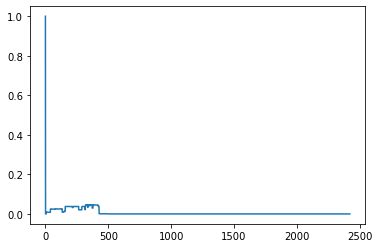

In [8]:
plt.plot(range(stepCount),np.array(thetas)[:,0])

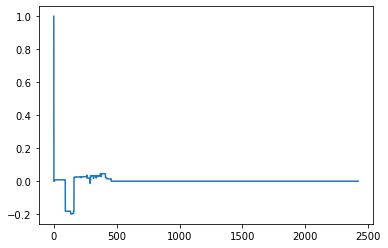

In [9]:
plt.plot(range(stepCount),np.array(thetas)[:,1])

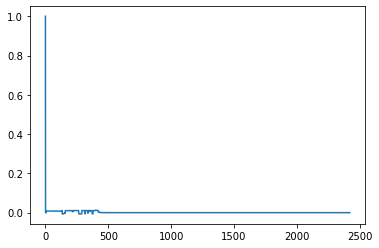

In [10]:
plt.plot(range(stepCount),np.array(thetas)[:,2])

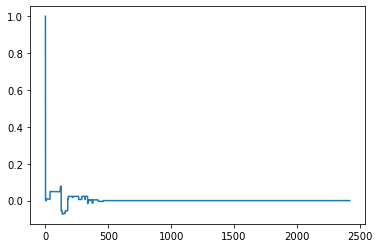

In [11]:
plt.plot(range(stepCount),np.array(thetas)[:,3])

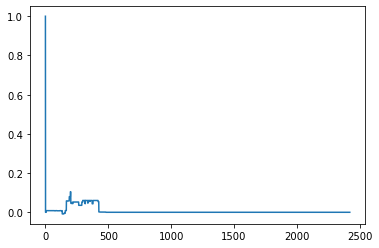

In [12]:
plt.plot(range(stepCount),np.array(thetas)[:,4])

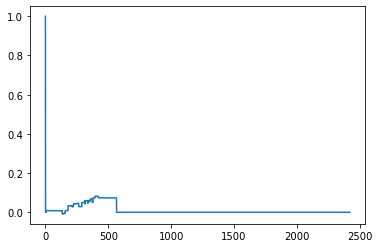

In [13]:
plt.plot(range(stepCount),np.array(thetas)[:,5])

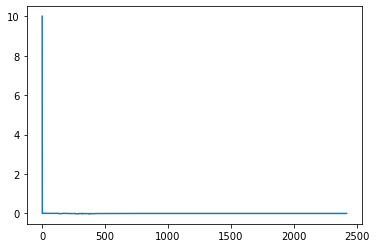

In [14]:
plt.plot(range(stepCount),np.array(thetas)[:,6])

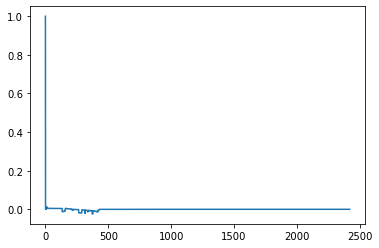

In [15]:
plt.plot(range(stepCount),np.array(thetas)[:,7])